# Heart Disease Classification

This dataset is from Kaggle https://www.kaggle.com/c/ec524-heart-disease/data?select=train.csv

we will try to classify if an an individual have heart disease or not based on these features:

1.age

2.sex

3.chest_pain: type of chest pain

    Value of 1: typical angina
    
    Value of 2: atypical angina
    
    Value of 3: non-anginal pain
    
    Value of 4: asymptomatic
    
4.resting_bp: resting blood pressure

5.cholestoral: serum cholestoral in mg/dl

6.high_sugar: an indicator for whether fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7.ecg: resting electrocardiographic results

    Value of 0: normal
    
    Value of 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    Value of 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
8.max_rate: maximum heart rate achieved

9.exercise_angina: exercise induced angina (1 = yes; 0 = no)

10.st_depression: ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment

    Value of 1: upsloping
    
    Value of 2: flat
    
    Value of 3: downsloping
    
12.vessels: number of major vessels (0–3) colored by flourosopy

13.thalium_scan: thalium heart scan

    Value of 3: normal
    
    Value of 6: fixed defect
    
    Value of 7: reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_df = pd.read_csv("heart_train.csv")
raw_df

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,296,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
224,297,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,1
225,298,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
226,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


In [3]:
raw_df.describe()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,224.000000,226.000000,228.000000
mean,153.600877,54.368421,0.697368,3.157895,131.982456,248.337719,0.140351,1.026316,148.675439,0.324561,1.010526,1.596491,0.683036,4.809735,0.473684
std,85.501492,9.003928,0.460408,0.967115,17.827852,49.388909,0.348115,0.993020,23.969693,0.469241,1.146215,0.604233,0.962283,1.944586,0.500406
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,81.500000,48.000000,0.000000,3.000000,120.000000,212.750000,0.000000,0.000000,131.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,155.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.250000,60.250000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


# Missing values


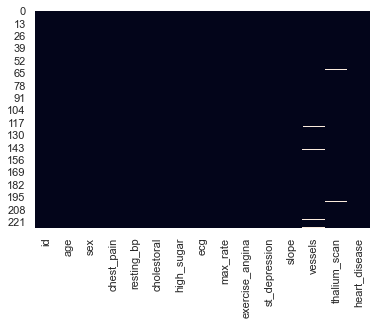

In [4]:
sns.heatmap(raw_df.isnull(),cbar=False)

Few data points are missing. Now let us see how much is missing

In [5]:
null = [feature for feature in raw_df.columns if raw_df[feature].isnull().sum()>1]

#print the percentage of missing val
for i in null:
    print("{} {} % is missing".format(i,np.round(raw_df[i].mean(),3)))

vessels 0.683 % is missing
thalium_scan 4.81 % is missing


There is small percentage of missing values in the dataset. The rows with missing values will be dropped

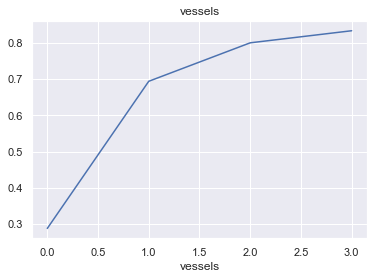

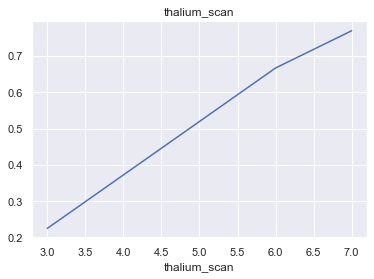

In [7]:
for i in null:
    data = raw_df.copy()
    data.groupby(i)['heart_disease'].mean().plot()
    plt.title(i)
    plt.show()

The above feature have a positive linear relationship with heart_disease

In [9]:
#drop null val
df = raw_df.dropna()

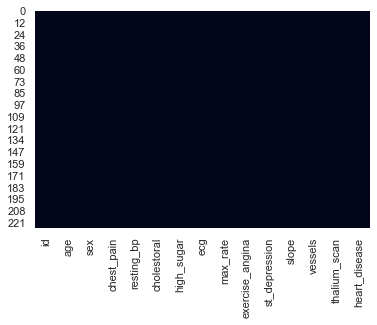

In [10]:
sns.heatmap(df.isnull(),cbar=False)

In [12]:
#unique values in each feature
df.nunique(axis=0)

id                 222
age                 40
sex                  2
chest_pain           4
resting_bp          45
cholestoral        128
high_sugar           2
ecg                  3
max_rate            88
exercise_angina      2
st_depression       39
slope                3
vessels              4
thalium_scan         3
heart_disease        2
dtype: int64

In [13]:
df = df.drop('id', axis = 1)

In [12]:
#find the correlation between features
df.corr()

,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
age,1.000000,-0.136501,0.097059,0.265537,0.206949,0.127195,0.129389,-0.409325,0.094826,0.203891,0.174437,0.343775,0.079695,0.202968
sex,-0.136501,1.000000,-0.022929,-0.053345,-0.226932,0.005408,0.053784,-0.018506,0.084628,0.075706,-0.004218,0.090027,0.361995,0.263496
chest_pain,0.097059,-0.022929,1.000000,-0.047339,0.151316,-0.050591,0.050285,-0.352852,0.353130,0.160861,0.115168,0.216272,0.236230,0.401876
resting_bp,0.265537,-0.053345,-0.047339,1.000000,0.131013,0.177163,0.129585,-0.043517,0.061622,0.172278,0.117621,0.057628,0.145229,0.159486
cholestoral,0.206949,-0.226932,0.151316,0.131013,1.000000,0.013089,0.134095,-0.005126,0.132063,0.050703,-0.011392,0.143028,-0.022709,0.138368
high_sugar,0.127195,0.005408,-0.050591,0.177163,0.013089,1.000000,0.012226,-0.017651,-0.048686,-0.000371,0.022359,0.127679,0.066667,-0.034934
ecg,0.129389,0.053784,0.050285,0.129585,0.134095,0.012226,1.000000,-0.008351,0.052523,0.076505,0.114291,0.111023,0.013018,0.156452
max_rate,-0.409325,-0.018506,-0.352852,-0.043517,-0.005126,-0.017651,-0.008351,1.000000,-0.369249,-0.360400,-0.400828,-0.242915,-0.242330,-0.399633
exercise_angina,0.094826,0.084628,0.353130,0.061622,0.132063,-0.048686,0.052523,-0.369249,1.000000,0.262294,0.252234,0.123784,0.317336,0.378002
st_depression,0.203891,0.075706,0.160861,0.172278,0.050703,-0.000371,0.076505,-0.360400,0.262294,1.000000,0.580028,0.295569,0.373408,0.416247


C:\Users\omari\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\omari\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\omari\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\omari\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\omari\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\omari\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

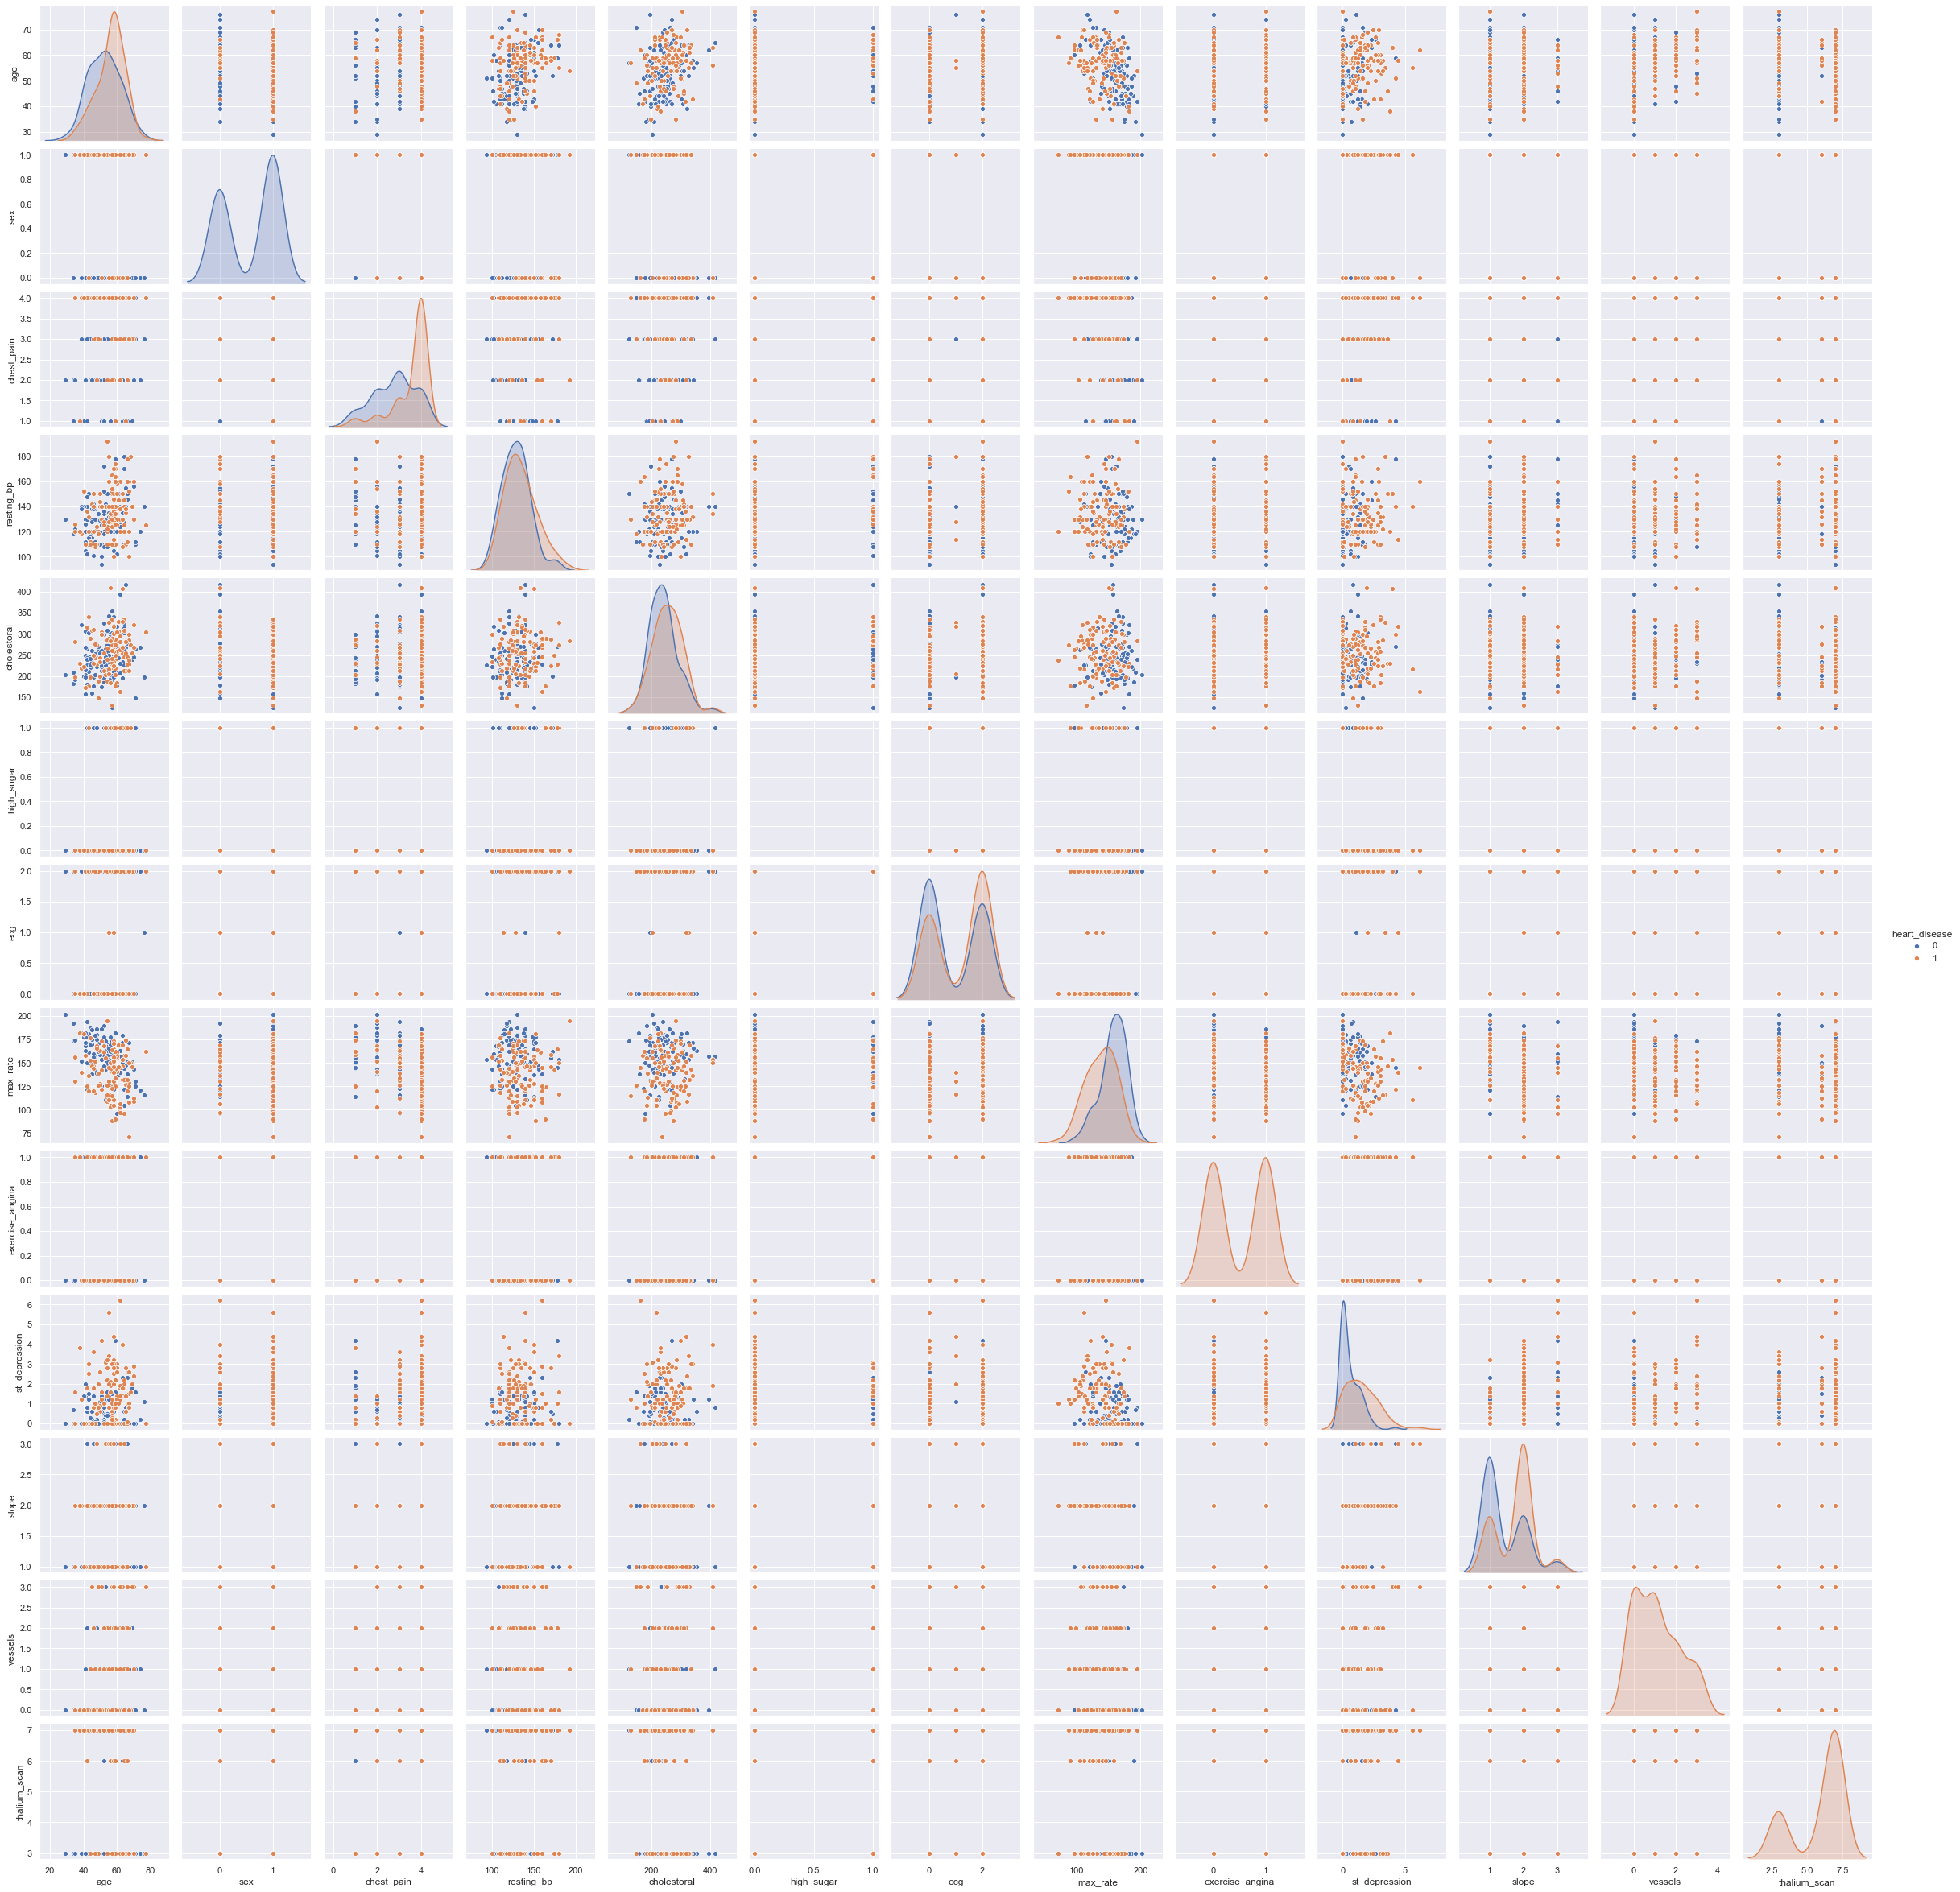

In [15]:
sns.pairplot(df, hue = 'heart_disease')

As seen on pairplot the datapoint are overlapping. linear algorithms won't be the best option, since the data cannot be linearly separable. I will proceed with non linear model like Random Forest.

# Model

In [22]:
y = df['heart_disease']
x = df.drop('heart_disease', axis = 1)

In [23]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
cls.score(x_train,y_train)


1.0

In [26]:
cls.score(x_test,y_test)

0.7777777777777778

Looks like the model has overfitted. I will perform hyper parameter tunning to reduce the overfitting

In [27]:
#hyperparameter tunning with Randomize search cv
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestRegressor(n_jobs = -1)
parameters={'max_depth':[3,10,50,100,400,300,None],
                'n_estimators':[10,100,200,300,400,500],
                'max_features':randint(0,15),
                'bootstrap':[True,False],
                
                
                
              }

<IPython.core.display.Javascript object>

In [28]:
def hypertunning(est, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

#get the right parameters to use
rf_parameters, rf_ht_score = hypertunning(est, parameters, 40, x, y)

In [29]:
rf_parameters

{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_estimators': 300}

In [49]:
#using different parameters for better result
classify = RandomForestClassifier(bootstrap = True, max_depth = 3, max_features = 2, n_estimators= 500)
classify.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=500)

In [50]:
classify.score(x_train,y_train)

0.8926553672316384

In [51]:
classify.score(x_test,y_test)

0.8

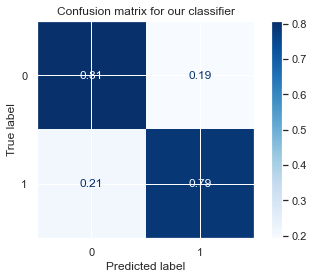

In [52]:
from sklearn.metrics import plot_confusion_matrix

#mat = confusion_matrix(classify, x_test, y_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(classify, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()


The model made more false negetives than False positives.This is a health dataset we need to minimize the false negetives. we don't need to classify a patient as negetive when they actually have heart disease. The model needs some work to improve the Recall.